In [80]:
import random
import numpy as np
import cv2
from mtcnn import MTCNN
import matplotlib.pyplot as plt
from PIL import Image
import math

In [81]:
image = cv2.imread('Mr_bean.jpg',0)

result = np.zeros(image.shape,np.uint8)

row,col = image.shape

threshold = 0.95
prob = 0.05

for i in range(row):
    for j in range(col):
        rand_num = random.random()

        if rand_num < prob:
                result[i][j] = 0
        elif rand_num > threshold:
            result[i][j] = 255
        else:
            result[i][j] = image[i][j]
cv2.imwrite('Mr Bean/salt_pepper_img.jpg',result)

True

In [101]:
img = cv2.imread('Mr Bean/salt_pepper_img.jpg',0)
result = np.zeros(img.shape)

rows , cols = img.shape

for i in range (1,rows-1):
    for j in range(1,cols-1):
        small_img = img[i-1:i+2, j-1:j+2]
        small_img_1d = small_img.reshape(9)
        sorted_small_img_1d = np.sort(small_img_1d)
        result[i,j] = sorted_small_img_1d[4]
        
cv2.imwrite('Mr Bean/without_noise.jpg',result)

True

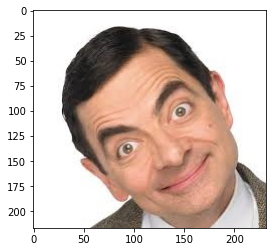

In [102]:
img = plt.imread("Mr_bean.jpg",0)
# img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img)
plt.show()

In [103]:
face_detector = MTCNN()

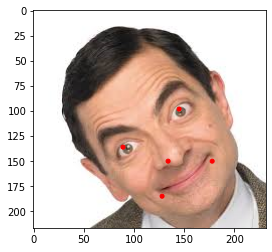

In [104]:
results = face_detector.detect_faces(img)

def draw_facebox_and_keypoints(result_list):
    # load the image
    data = plt.imread("Mr_bean.png")
    plt.imshow(data)
    ax = plt.gca()
    # # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # draw the dots
        for key, value in result['keypoints'].items():
            # create and draw dot
            dot = plt.Circle(value, radius=2, color='red')
            ax.add_patch(dot)
            # show the plot
    plt.show()# filename = 'test1.jpg' # filename is defined above, otherwise uncomment
    
draw_facebox_and_keypoints(results)


In [105]:
def EuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

In [106]:
def alignment_procedure(img, left_eye, right_eye):

    #this function aligns given face in img based on left and right eye coordinates

    left_eye_x, left_eye_y = left_eye
    right_eye_x, right_eye_y = right_eye

    #-----------------------
    #find rotation direction

    if left_eye_y > right_eye_y:
        point_3rd = (right_eye_x, left_eye_y)
        direction = -1 #rotate same direction to clock
    else:
        point_3rd = (left_eye_x, right_eye_y)
        direction = 1 #rotate inverse direction of clock

    #-----------------------
    #find length of triangle edges

    a = EuclideanDistance(np.array(left_eye), np.array(point_3rd))
    b = EuclideanDistance(np.array(right_eye), np.array(point_3rd))
    c = EuclideanDistance(np.array(right_eye), np.array(left_eye))

    #-----------------------

    #apply cosine rule

    if b != 0 and c != 0: #this multiplication causes division by zero in cos_a calculation

        cos_a = (b*b + c*c - a*a)/(2*b*c)
        angle = np.arccos(cos_a) #angle in radian
        angle = (angle * 180) / math.pi #radian to degree

        #-----------------------
        #rotate base image

        if direction == -1:
            angle = 90 - angle

        img = Image.fromarray(img)
        img = np.array(img.rotate(direction * angle))

    #-----------------------

    return img #return img anyway

In [107]:
detection = results[0]
keypoints = detection["keypoints"]
left_eye = keypoints["left_eye"]
right_eye = keypoints["right_eye"]

img = alignment_procedure(img, left_eye, right_eye)

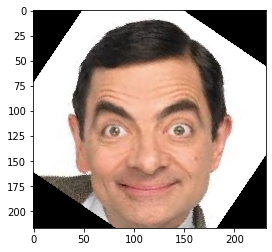

In [108]:
plt.imshow(img)